In [ ]:
# Installations
!pip install -U scikit-fuzzy

# Imports
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

In [ ]:
# Antecedents and Consequents
temperature = ctrl.Antecedent(np.arange(0, 201, 1), 'temperature') # F
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity') # %
windspeed = ctrl.Antecedent(np.arange(0, 56, 1), 'windspeed') # mph
ac_temperature = ctrl.Consequent(np.arange(45, 101, 1), 'ac_temperature') # F

# Membership Functions
temperature.automf(names = ["cold","average", "hot"])
humidity.automf(names = ["none", "medium", "high"])
windspeed.automf(names = ["none", "little", "medium", "high"])

ac_temperature["cooling"] = fuzz.trimf(ac_temperature.universe, [45,60,70])
ac_temperature["none"] = fuzz.trimf(ac_temperature.universe, [50,65,80])
ac_temperature["heating"] = fuzz.trimf(ac_temperature.universe, [70, 80, 100])

In [ ]:
# Rules
rule1 = ctrl.Rule(antecedent=((temperature["hot"] & (humidity["medium"] | humidity["high"])) |
                              (temperature["hot"] & (windspeed["none"] | windspeed["little"])) |
                              (temperature["average"] & (humidity["medium"] | humidity["high"])) |
                              (humidity["high"] & (windspeed["none"] | windspeed["little"]))),
                  consequent = ac_temperature["cooling"], label = "rule cooling")

rule2 = ctrl.Rule(antecedent=((temperature["hot"] & (windspeed["medium"] | windspeed["high"])) |
                              (temperature["average"] & (windspeed["none"] | windspeed["little"] | windspeed["medium"])) |
                              (windspeed["medium"] & humidity["medium"])),
                  consequent = ac_temperature["none"], label = "rule none")

rule3 = ctrl.Rule(antecedent=((temperature["cold"] & (humidity["none"] | humidity["medium"])) |
                              (temperature["cold"] & (windspeed["none"] | windspeed["medium"])) |
                              (temperature["average"] & windspeed["high"])),
                  consequent = ac_temperature["heating"], label = "rule heating")
system = ctrl.ControlSystem(rules=[rule1, rule2, rule3])

# Visualie Rules
# rule1.view()
# rule2.view()
# rule3.view()

68.92090438727149 F


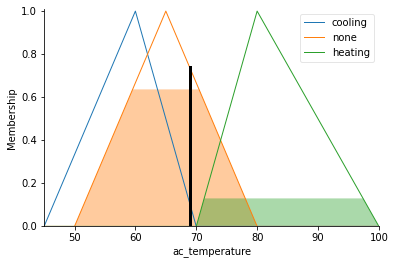

In [ ]:
# Simulation
  # Temperature = 0-100 F
  # Humidity = 0-100%
  # Windspeed = 0-55 mph
  # AC Temperature = 0-100 F
simulation = ctrl.ControlSystemSimulation(system)
simulation.input['temperature'] = 87
simulation.input['humidity'] = 0
simulation.input['windspeed'] = 30
simulation.compute()
print(simulation.output["ac_temperature"], "F")
ac_temperature.view(sim = simulation)
